<a href="https://colab.research.google.com/github/nghess/fractal-tools/blob/main/3D_ifft_Fractal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import numpy as np
import matplotlib.pyplot as plt

In [77]:
# Parameters
beta = 4.5
sdim = 128

In [78]:
# Set Seed
seed = 523
np.random.seed(seed);

In [79]:
# Build power spectrum 
f = [x/sdim for x in range(1, int(sdim/2)+1, 1)] + [y/sdim for y in range(-int(sdim/2), 0, 1)]
u = np.reshape(f, (sdim, 1))
v = np.reshape(f, (1, sdim))
w = np.reshape(f, (sdim, 1, 1))
powerspectrum = (u**2 + v**2 + w**2)**(-beta/2)

In [80]:
# Noise and ifft
phases = np.random.normal(0, 255, size=[sdim, sdim, sdim]);
complexpattern = np.fft.ifftn(powerspectrum**0.5 * (np.cos(2*np.pi*phases)+1j*np.sin(2*np.pi*phases)))

In [81]:
# Normalize result
realpattern = np.real(complexpattern)
rpmin = np.amin(realpattern)
realpattern = realpattern-rpmin;
rpmax = np.amax(realpattern);
realpattern = (realpattern/rpmax);

In [82]:
# Create vectors for 3d plot
z, x, y = realpattern.nonzero()
color = realpattern.flatten()
color = color[:-1]

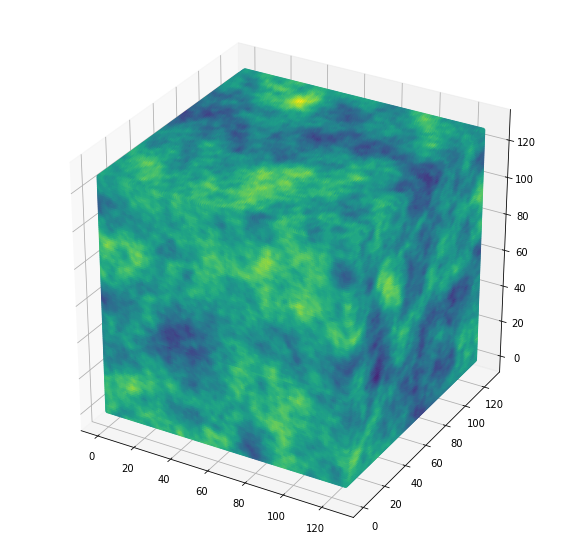

In [83]:
# Display 3d Fractal
fig = plt.figure()
plt.rcParams["figure.figsize"]=10,10
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=color, alpha=1)
plt.show()

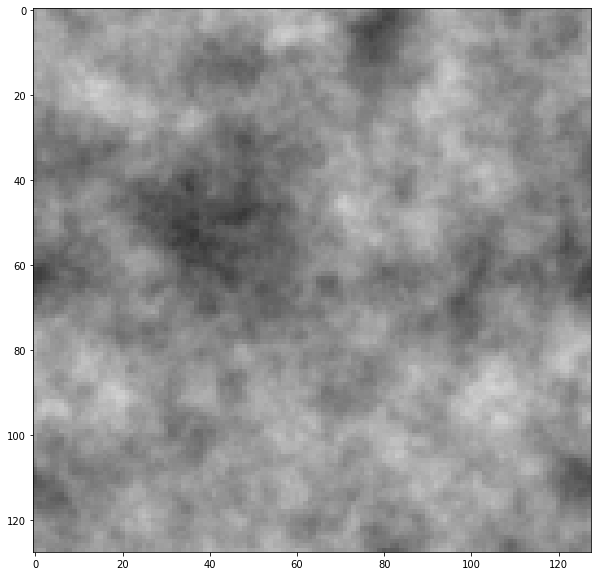

In [84]:
# Display result
plt.rcParams["figure.figsize"]=10,10
plt.imshow(realpattern[:,:,1], cmap='gray', vmin=0, vmax=1, aspect='auto')